In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Reading of the datasets
df1= pd.read_csv('sep.csv')
df2= pd.read_csv('feb.csv')

C:\Users\Hemant Shankar\AppData\Local\Temp\ipykernel_22596\1670672217.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df1= pd.read_csv('sep.csv')


In [3]:
df1.head()

,State Name,Branch Name,Village Name,Center Name,Customer Name,Out Standing Principal,Num Days Since Last Due,Bucket Name
0,S2,AUR,244,99,C100,672.04,0,Current (0 Days)
1,S1,HOS,515,36,C101,454.11,0,Current (0 Days)
2,S2,BAS,196,11,C102,371.22,0,Current (0 Days)
3,S2,PAL,273,14,C103,9752.71,0,Current (0 Days)
4,S2,PAL,272,16,C104,11024.70,0,Current (0 Days)


In [4]:
df2.head()

,State,BRANCH NAME,VillageName,Center,Customer_Name,OutStanding_Principal,Num_Days_SinceLAstDue,Bucket_Name
0,S2,PAL,271,37,C100,5820,0,Current (0 Days)
1,S2,AUR,239,17,C101,2117,0,Current (0 Days)
2,S2,PAL,272,33,C102,11478,0,Current (0 Days)
3,S2,AMB,229,39,C103,3730,0,Current (0 Days)
4,S2,NAN,197,39,C104,5734,0,Current (0 Days)


In [5]:
# Renaming fields in Feb 2021 data for better and easy analysis.
df2 = df2.rename(columns={'State': 'State Name','BRANCH NAME': 'Branch Name', 'VillageName': 'Village Name', 'Center': 'Center Name', 'Customer_Name': 'Customer Name', 'OutStanding_Principal': 'OutStanding Principal', 'Num_Days_SinceLAstDue': 'Num Days Since Last Due', 'Bucket_Name': 'Bucket Name'} )

In [6]:
df2.head()

,State Name,Branch Name,Village Name,Center Name,Customer Name,OutStanding Principal,Num Days Since Last Due,Bucket Name
0,S2,PAL,271,37,C100,5820,0,Current (0 Days)
1,S2,AUR,239,17,C101,2117,0,Current (0 Days)
2,S2,PAL,272,33,C102,11478,0,Current (0 Days)
3,S2,AMB,229,39,C103,3730,0,Current (0 Days)
4,S2,NAN,197,39,C104,5734,0,Current (0 Days)


In [7]:
# Checking Feb 2020 data info 
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65648 entries, 0 to 65647
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   State Name               65648 non-null  object 
 1   Branch Name              65648 non-null  object 
 2   Village Name             65648 non-null  int64  
 3   Center Name              65648 non-null  object 
 4   Customer Name            65648 non-null  object 
 5   Out Standing Principal   65648 non-null  float64
 6   Num Days Since Last Due  65648 non-null  int64  
 7   Bucket Name              65648 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 4.0+ MB


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85676 entries, 0 to 85675
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   State Name               85676 non-null  object
 1   Branch Name              85676 non-null  object
 2   Village Name             85676 non-null  int64 
 3   Center Name              85676 non-null  object
 4   Customer Name            85676 non-null  object
 5   OutStanding Principal    85676 non-null  int64 
 6   Num Days Since Last Due  85676 non-null  int64 
 7   Bucket Name              85676 non-null  object
dtypes: int64(3), object(5)
memory usage: 5.2+ MB


In [9]:
# Checking the unique values of 'Bucket Name' feature from sep 2020 data
df1['Bucket Name'].unique()

array(['Current (0 Days)', 'W1(1-7 Days)', 'W2(8-14 Days)',
       'W3(15-21 Days)', 'W4(22-30 Days)', '31-60 Days', '61-90 Days',
       '91-120 Days', '121-150 Days', '151-180 Days', '181-275 Days',
       '276-365 Days', '>365 Days'], dtype=object)

In [10]:
df1['Num Days Since Last Due'].unique()

array([  0,   6,   2,   7,   3,   1,  13,  14,   8,  10,   9,  21,  15,
        16,  20,  17,  29,  22,  24,  28,  30,  23,  27,  50,  43,  37,
        41,  36,  38,  34,  35,  31,  51,  42,  59,  44,  48,  49,  52,
        45,  58,  56,  57,  55,  86,  77,  72,  69,  84,  76,  79,  90,
        65,  71,  78,  63,  85,  62,  64,  80,  70,  83,  87,  73,  66,
       106, 118,  91, 104,  97,  99,  93,  92, 120, 114, 101, 107, 111,
        94, 105, 108,  98, 113, 112, 119, 100, 115, 125, 133, 142, 149,
       126, 132, 139, 127, 147, 148, 146, 140, 128, 141, 134, 135, 136,
       121, 150, 129, 176, 177, 154, 163, 170, 161, 162, 156, 168, 153,
       169, 167, 155, 175, 174, 160, 182, 252, 204, 223, 181, 218, 191,
       183, 184, 239, 253, 240, 211, 209, 268, 189, 217, 261, 260, 227,
       205, 245, 238, 210, 267, 188, 232, 246, 198, 226, 202, 233, 196,
       195, 241, 220, 274, 212, 247, 266, 216, 344, 363, 316, 282, 350,
       365, 323, 330, 279, 302, 337, 541, 391, 386, 392, 371], d

In [11]:
df1['Customer Name'].unique()

array(['C100', 'C101', 'C102', ..., 'C65745', 'C65746', 'C65747'],
      dtype=object)

In [12]:
df1['Branch Name'].unique()

array(['AUR', 'HOS', 'BAS', 'PAL', 'KIN', 'HAD', 'AMB', 'BAL', 'NIL',
       'SHA', 'AKA', 'NAN', 'PAI', 'SIN', 'SAN', 'KUD', 'SIL', 'AHM',
       'SHI', 'NAI', 'GAN', 'LAT', 'PAC', 'DHU', 'BAD', 'CHA', 'SOR',
       'MEH', 'DEU', 'KRI', 'DAL', 'GAR', 'GUN', 'TUR', 'SIR', 'ROB',
       'HOL', 'MOT', 'RAM', 'NAR', 'JIN', 'SHE', 'BAG', 'REN', 'JAP',
       'KUN', 'RUN', 'PAT', 'BAH', 'PHU', 'BHA', 'LAH', 'CHH', 'SAK'],
      dtype=object)

In [13]:
# Performing an inner join on September 2020 and February 2021 data by 'Customer Name' & 'State Name' to 
# avoid new cutomers in feb 2021 and dropping cutomers who have two different states in sep and feb data.
result_df = pd.merge(df1, df2, on=['Customer Name', 'State Name'], how='inner')
result_df.head()

,State Name,Branch Name_x,Village Name_x,Center Name_x,Customer Name,Out Standing Principal,Num Days Since Last Due_x,Bucket Name_x,Branch Name_y,Village Name_y,Center Name_y,OutStanding Principal,Num Days Since Last Due_y,Bucket Name_y
0,S2,AUR,244,99,C100,672.04,0,Current (0 Days),PAL,271,37,5820,0,Current (0 Days)
1,S2,BAS,196,11,C102,371.22,0,Current (0 Days),PAL,272,33,11478,0,Current (0 Days)
2,S2,PAL,273,14,C103,9752.71,0,Current (0 Days),AMB,229,39,3730,0,Current (0 Days)
3,S2,PAL,272,16,C104,11024.70,0,Current (0 Days),NAN,197,39,5734,0,Current (0 Days)
4,S2,AUR,242,14,C105,482.41,0,Current (0 Days),NAN,197,39,2425,0,Current (0 Days)


In [14]:
# Info of resultant data
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21393 entries, 0 to 21392
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State Name                 21393 non-null  object 
 1   Branch Name_x              21393 non-null  object 
 2   Village Name_x             21393 non-null  int64  
 3   Center Name_x              21393 non-null  object 
 4   Customer Name              21393 non-null  object 
 5   Out Standing Principal     21393 non-null  float64
 6   Num Days Since Last Due_x  21393 non-null  int64  
 7   Bucket Name_x              21393 non-null  object 
 8   Branch Name_y              21393 non-null  object 
 9   Village Name_y             21393 non-null  int64  
 10  Center Name_y              21393 non-null  object 
 11  OutStanding Principal      21393 non-null  int64  
 12  Num Days Since Last Due_y  21393 non-null  int64  
 13  Bucket Name_y              21393 non-null  obj

In [15]:
# Unimportant analysis
pdf= result_df[result_df['Bucket Name_x']== '151-180 Days']
pdf

,State Name,Branch Name_x,Village Name_x,Center Name_x,Customer Name,Out Standing Principal,Num Days Since Last Due_x,Bucket Name_x,Branch Name_y,Village Name_y,Center Name_y,OutStanding Principal,Num Days Since Last Due_y,Bucket Name_y
21285,S2,AKA,212,16,C65447,9469.76,177,151-180 Days,KIN,192,14,40000,0,Current (0 Days)
21286,S2,SIL,235,41,C65448,21421.32,154,151-180 Days,GAN,220,56,28326,0,Current (0 Days)
21287,S2,CHA,274,35,C65449,967.56,163,151-180 Days,AUR,242,13,38742,0,Current (0 Days)
21288,S2,BAD,225,35,C65451,12287.59,176,151-180 Days,KIN,192,13,38734,0,Current (0 Days)
21289,S2,LAT,351,43,C65454,18534.77,154,151-180 Days,KIN,192,13,39054,0,Current (0 Days)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21352,S2,PAC,286,12,C65578,10258.72,170,151-180 Days,NAI,200,17,38423,0,Current (0 Days)
21353,S2,SIL,237,17,C65579,8092.60,155,151-180 Days,NAI,200,17,48421,0,Current (0 Days)
21354,S2,AMB,226,17,C65580,5155.09,177,151-180 Days,NAI,200,42,48421,0,Current (0 Days)
21355,S2,BAD,227,19,C65581,7809.06,175,151-180 Days,NIL,358,13,38423,0,Current (0 Days)


In [16]:
# Creating new field of difference in due amount
result_df['Due Diff(in days)']= result_df['Num Days Since Last Due_y'] - result_df['Num Days Since Last Due_x']
result_df.tail()

,State Name,Branch Name_x,Village Name_x,Center Name_x,Customer Name,Out Standing Principal,Num Days Since Last Due_x,Bucket Name_x,Branch Name_y,Village Name_y,Center Name_y,OutStanding Principal,Num Days Since Last Due_y,Bucket Name_y,Due Diff(in days)
21388,S2,NAN,197,70,C65696,14657.13,182,181-275 Days,LAT,352,77,19081,0,Current (0 Days),-182
21389,S2,PAI,244,42,C65697,20746.16,232,181-275 Days,AUR,237,20,19084,0,Current (0 Days),-232
21390,S2,AMB,347,12,C65730,20400.70,350,276-365 Days,PAI,245,43,48421,0,Current (0 Days),-350
21391,S2,AMB,227,47,C65734,30247.66,330,276-365 Days,SHA,279,12,38741,0,Current (0 Days),-330
21392,S2,SHI,117,19,C65747,1069.89,0,Current (0 Days),AMB,349,88,23843,0,Current (0 Days),0


In [17]:
# Extracting values from buckets
result_df['value_x'] = result_df['Bucket Name_x'].str.extract('(\d+)')
result_df['value_y'] = result_df['Bucket Name_y'].str.extract('(\d+)')

# Convert the extracted values to numeric
result_df['value_x'] = pd.to_numeric(result_df['value_x'], errors='coerce')
result_df['value_y'] = pd.to_numeric(result_df['value_y'], errors='coerce')

# Create new columns 'bucket_difference' & 'principal_difference' to store the difference
result_df['bucket_difference'] = result_df['value_x'] - result_df['value_y']
result_df['principal_difference'] = result_df['OutStanding Principal'] - result_df['Out Standing Principal']
# Create new columns 'Bucket Movement' & 'Out Principal' to indicate positive or negative difference
result_df['Bucket Movement'] = result_df['bucket_difference'].apply(lambda x: 'Improvement' if x > 0 else 'Deterioration' if x < 0 else 'Same')
result_df['Out Principal'] = result_df['principal_difference'].apply(lambda x: 'Increase' if x > 0 else 'Decrease' if x < 0 else 'Same')
# Deciding Portfolio Quality by considering all possible scenarios
conditions = [
    ((result_df['Bucket Movement'] == 'Improvement') & (result_df['Out Principal'] == 'Decrease')),
    ((result_df['Bucket Movement'] == 'Deterioration') & (result_df['Out Principal'] == 'Increase')),
    ((result_df['Bucket Movement'] == 'Same') & (result_df['Out Principal'] == 'Same')),
    ((result_df['Bucket Movement'] == 'Same') & (result_df['Out Principal'] == 'Increase')),
    ((result_df['Bucket Movement'] == 'Same') & (result_df['Out Principal'] == 'Decrease')),
    ((result_df['Bucket Movement'] == 'Improvement') & (result_df['Out Principal'] == 'Same')),
    ((result_df['Bucket Movement'] == 'Deterioration') & (result_df['Out Principal'] == 'Same')),
    ((result_df['Bucket Movement'] == 'Improvement') & (result_df['Out Principal'] == 'Increase')),
    ((result_df['Bucket Movement'] == 'Deterioration') & (result_df['Out Principal'] == 'Decrease'))
]

choices = ['Excellent', 'Worse', 'Good','Need Improvement', 'Good', 'Better', 'Need Improvement', 'Good', 'Need Improvement']
result_df['Portfolio Quality'] = np.select(conditions, choices, default='Unknown')

# Dropping unnecessary fields
result_df = result_df.drop(['value_x', 'value_y', 'bucket_difference', 'principal_difference'], axis=1)
result_df.head(10)

,State Name,Branch Name_x,Village Name_x,Center Name_x,Customer Name,Out Standing Principal,Num Days Since Last Due_x,Bucket Name_x,Branch Name_y,Village Name_y,Center Name_y,OutStanding Principal,Num Days Since Last Due_y,Bucket Name_y,Due Diff(in days),Bucket Movement,Out Principal,Portfolio Quality
0,S2,AUR,244,99,C100,672.04,0,Current (0 Days),PAL,271,37,5820,0,Current (0 Days),0,Same,Increase,Need Improvement
1,S2,BAS,196,11,C102,371.22,0,Current (0 Days),PAL,272,33,11478,0,Current (0 Days),0,Same,Increase,Need Improvement
2,S2,PAL,273,14,C103,9752.71,0,Current (0 Days),AMB,229,39,3730,0,Current (0 Days),0,Same,Decrease,Good
3,S2,PAL,272,16,C104,11024.70,0,Current (0 Days),NAN,197,39,5734,0,Current (0 Days),0,Same,Decrease,Good
4,S2,AUR,242,14,C105,482.41,0,Current (0 Days),NAN,197,39,2425,0,Current (0 Days),0,Same,Increase,Need Improvement
5,S2,KIN,192,44,C106,1845.74,0,Current (0 Days),BAD,225,39,1069,0,Current (0 Days),0,Same,Decrease,Good
6,S2,AMB,228,46,C109,2507.35,0,Current (0 Days),HAD,179,91,579,0,Current (0 Days),0,Same,Decrease,Good
7,S2,AUR,239,16,C110,421.47,0,Current (0 Days),BAS,196,56,13,0,Current (0 Days),0,Same,Decrease,Good
8,S2,KIN,192,44,C111,980.35,0,Current (0 Days),AMB,226,45,2425,0,Current (0 Days),0,Same,Increase,Need Improvement
9,S2,NIL,357,15,C114,1661.04,0,Current (0 Days),AMB,228,50,1474,0,Current (0 Days),0,Same,Decrease,Good


In [18]:
# Analysing the out principal feature
value_counts = result_df['Out Principal'].value_counts()
value_counts

Increase    11049
Decrease    10344
Name: Out Principal, dtype: int64

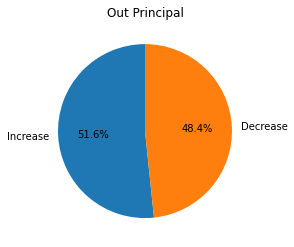

In [19]:
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Out Principal')
plt.show()

In [20]:
# Getting the portfolio state summary
value_counts = result_df['State Name'].value_counts()
value_counts

S2    14208
S1     5119
S3     1763
S5      161
S6      125
S4       17
Name: State Name, dtype: int64

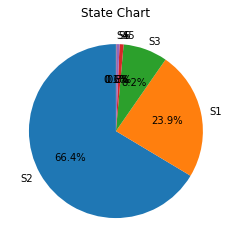

In [21]:
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('State Chart')
plt.show()

In [22]:
# Getting the portfolio quality summary
value_counts = result_df['Portfolio Quality'].value_counts()
value_counts

Good                13330
Need Improvement     8020
Excellent              43
Name: Portfolio Quality, dtype: int64

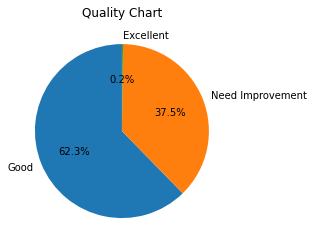

In [23]:
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Quality Chart')
plt.show()

In [24]:
# Count the occurrences of each 'Portfolio Quality' value for each 'State'
portfolio_counts = result_df.groupby(['State Name', 'Portfolio Quality']).size().unstack(fill_value=0)
portfolio_counts

Portfolio Quality,Excellent,Good,Need Improvement
State Name,,,
S1,37,4213,869
S2,6,7641,6561
S3,0,1263,500
S4,0,14,3
S5,0,97,64
S6,0,102,23


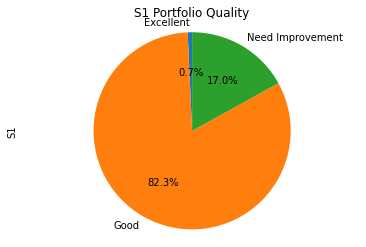

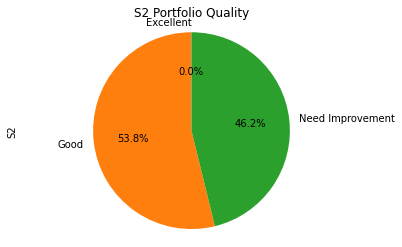

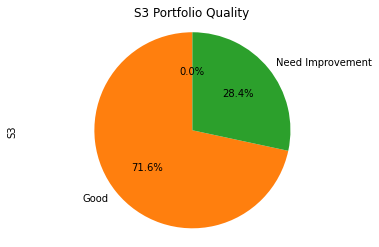

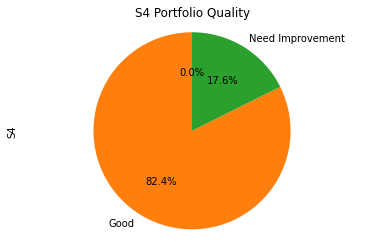

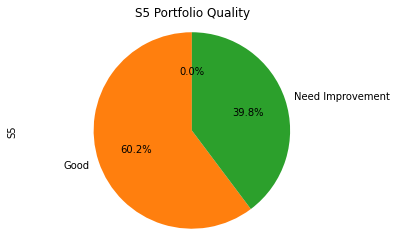

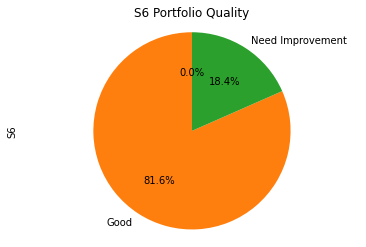

In [25]:
# Plotting pie charts for each state
for state in portfolio_counts.index:
    state_counts = portfolio_counts.loc[state]
    state_counts.plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'{state} Portfolio Quality') 
    plt.axis('equal')  
    plt.show()

### Conclusion
1. S2 and S5 states are not performing well comparatively and should be funded anymore.
2. S1, S3, S4, and S6 are performing good. They sould be funded more.
3. Most of the customers are from S1, S2, and S3.
4. S1 have the most premium customers and is the best performing state. 
5. 51.6% customers have taken more loans, where 48.4% cutomers have repaid the loan.

### Future Aspects
1. Exploring the analysis of the customers, who have two different states in Feb and Sep dataset can also lead to various important insights.
2. Exploration of the valuable analysis & insights from the new customers in Feb 2021 dataset also has great potential.
3. Exploration on village and center level can also help to make strategies more efficiently and earn more revenue from better fundings.